## Final Project Submission

Please fill out:
* Student name:     Jared Ateka
* Student pace:     Remote
* Scheduled project review date/time:   31/11/2025
* Instructor name:  Brian Chacha
* Blog post URL:


## 1. Project Overview

### Problem Statement
Ateqa Holidings Limited is expanding into aviation by purchasing and operating aircraft for commercial and private enterprises. We need to identify the lowest-risk aircraft types to minimize operational risks in this new business venture.
The goal is to minimize operational risks while establishing a safety-first reputation in this new industry.

## Objectives
1. Analyze historical aviation accident data to identify safety patterns.
2. Determine which aircraft characteristics correlate with lower accident rates.
3. Provide data-driven recommendations for aircraft acquisition.



## 2. Data Loading and Undestanding

In [2]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Aviation_Data.csv")
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
df.columns.tolist()

['Event.Id',
 'Investigation.Type',
 'Accident.Number',
 'Event.Date',
 'Location',
 'Country',
 'Latitude',
 'Longitude',
 'Airport.Code',
 'Airport.Name',
 'Injury.Severity',
 'Aircraft.damage',
 'Aircraft.Category',
 'Registration.Number',
 'Make',
 'Model',
 'Amateur.Built',
 'Number.of.Engines',
 'Engine.Type',
 'FAR.Description',
 'Schedule',
 'Purpose.of.flight',
 'Air.carrier',
 'Total.Fatal.Injuries',
 'Total.Serious.Injuries',
 'Total.Minor.Injuries',
 'Total.Uninjured',
 'Weather.Condition',
 'Broad.phase.of.flight',
 'Report.Status',
 'Publication.Date']

In [5]:
df.shape

(90348, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [7]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


### 3. Data Cleaning and Preparation

In [8]:
# Create a copy for cleaning
df_clean = df.copy()

In [9]:
# Convert date column
df_clean['Event.Date'] = pd.to_datetime(df_clean['Event.Date'], errors='coerce')


In [10]:
# Handle missing values in key columns
print("Missing values in key columns:")
print(df_clean[['Make', 'Model', 'Aircraft.Category', 'Engine.Type', 'Injury.Severity']].isnull().sum())

Missing values in key columns:
Make                  1522
Model                 1551
Aircraft.Category    58061
Engine.Type           8536
Injury.Severity       2459
dtype: int64


In [11]:
# Fill missing engine types with most common value
df_clean['Engine.Type'].fillna(df_clean['Engine.Type'].mode()[0], inplace=True)
df_clean.head(3)


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007


In [12]:
# Create a simplified injury severity classification
def categorize_injury(severity):
    if pd.isna(severity):
        return 'Unknown'
    elif 'Fatal' in str(severity):
        return 'Fatal'
    elif 'Non-Fatal' in str(severity):
        return 'Non-Fatal'
    else:
        return str(severity)

df_clean['Injury.Category'] = df_clean['Injury.Severity'].apply(categorize_injury)


In [13]:
# Create total injuries column
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']
df_clean[injury_cols] = df_clean[injury_cols].fillna(0)
df_clean['Total.Injuries'] = df_clean[injury_cols].sum(axis=1)

print(f"df_clean dataset shape: {df_clean.shape}")

df_clean dataset shape: (90348, 33)


## 4. Analyse the Data

### 4.1. Accident Trends Over Time

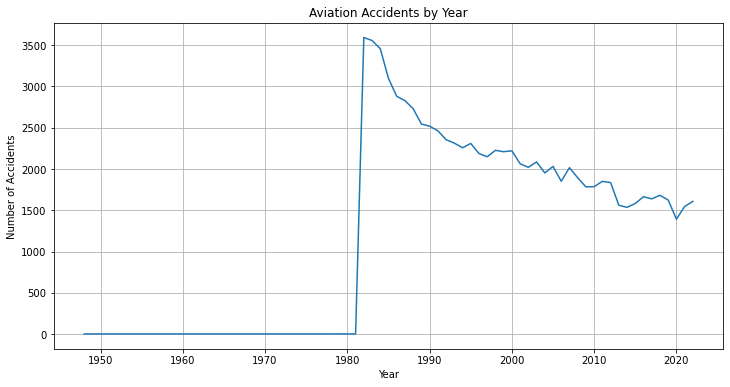

In [14]:
# Extract year from event date
df_clean['Year'] = df_clean['Event.Date'].dt.year

# Plot accidents by year
plt.figure(figsize=(12, 6))
accidents_by_year = df_clean.groupby('Year').size()
accidents_by_year.plot(kind='line', title='Aviation Accidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

### 4.2 Injury Severity Analysis

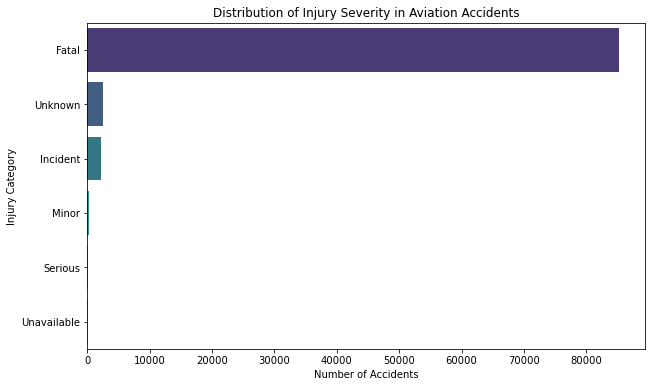

Injury Severity Breakdown:
Fatal          85183
Unknown         2459
Incident        2219
Minor            218
Serious          173
Unavailable       96
Name: Injury.Category, dtype: int64


In [15]:
plt.figure(figsize=(10, 6))
injury_counts = df_clean['Injury.Category'].value_counts()

sns.barplot(x=injury_counts.values, y=injury_counts.index, palette='viridis')
plt.title('Distribution of Injury Severity in Aviation Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Injury Category')
plt.show()

print("Injury Severity Breakdown:")
print(injury_counts)

### 4.3 Aircraft Category Analysis

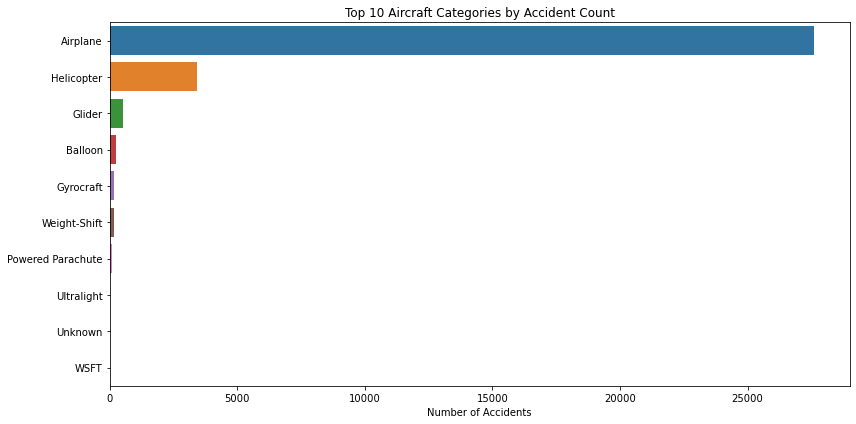

To 10 Aircraft Category by Accident Breakdown:
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Name: Aircraft.Category, dtype: int64


In [16]:
# Analyze by aircraft category
plt.figure(figsize=(12, 6))
category_counts = df_clean['Aircraft.Category'].value_counts().head(10)
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('Top 10 Aircraft Categories by Accident Count')
plt.xlabel('Number of Accidents')
plt.tight_layout()
plt.show()

print("To 10 Aircraft Category by Accident Breakdown:")
print(category_counts)

### 4.4 Analysis by Aircraft Damage, Phase of Flight and Weather Condition 

Aircraft damage count Breakdown:
Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: Aircraft.damage, dtype: int64
Top 10 Accident Phases of Flight Breakdown:
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Name: Broad.phase.of.flight, dtype: int64
Weather Conditions During Accidents Breakdown:
VMC    77303
IMC     5976
UNK      856
Unk      262
Name: Weather.Condition, dtype: int64


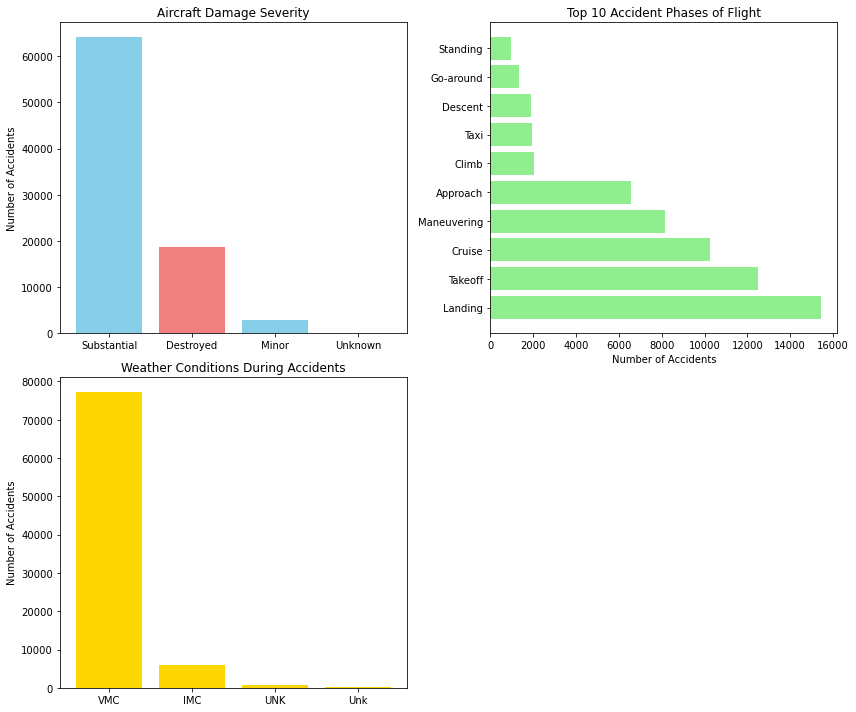

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()  
# Aircraft Damage
damage_counts = df_clean['Aircraft.damage'].value_counts()
axes[0].bar(damage_counts.index, damage_counts.values, color=['skyblue', 'lightcoral'])
axes[0].set_title('Aircraft Damage Severity')
axes[0].set_ylabel('Number of Accidents')

print("Aircraft damage count Breakdown:")
print(damage_counts)

# Phase of Flight
phase_counts = df_clean['Broad.phase.of.flight'].value_counts().head(10)
axes[1].barh(phase_counts.index, phase_counts.values, color='lightgreen')
axes[1].set_title('Top 10 Accident Phases of Flight')
axes[1].set_xlabel('Number of Accidents')
print("Top 10 Accident Phases of Flight Breakdown:")
print(phase_counts)

# Weather Conditions
weather_counts = df_clean['Weather.Condition'].value_counts().head(5)
axes[2].bar(weather_counts.index, weather_counts.values, color='gold')
axes[2].set_title('Weather Conditions During Accidents')
axes[2].set_ylabel('Number of Accidents')
plt.xticks(rotation=45)
print("Weather Conditions During Accidents Breakdown:")
print(weather_counts)

# Hide unused subplot
axes[3].axis('off')

plt.tight_layout()
plt.show()

### 4.5 Engine Type Safety Analysis

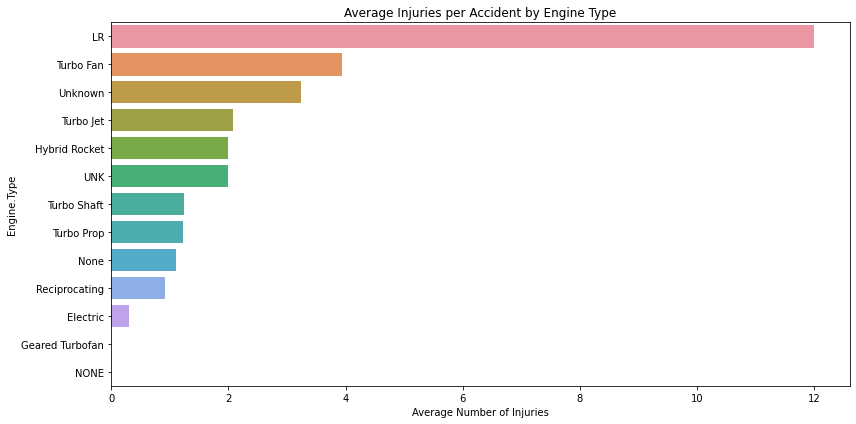

Engine Type Safety Analysis:
                 Avg_Injuries  Accident_Count
Engine.Type                                  
LR                  12.000000               2
Turbo Fan            3.947199            2481
Unknown              3.243296            2051
Turbo Jet            2.081081             703
Hybrid Rocket        2.000000               1
UNK                  2.000000               1
Turbo Shaft          1.239956            3609
Turbo Prop           1.222943            3391
None                 1.105263              19
Reciprocating        0.928368           76607
Electric             0.300000              10
Geared Turbofan      0.000000              12
NONE                 0.000000               2


In [30]:
# Analyze safety by engine type
engine_safety = df_clean.groupby('Engine.Type').agg({
    'Total.Injuries': 'mean',
    'Event.Id': 'count'
}).rename(columns={'Event.Id': 'Accident_Count', 'Total.Injuries': 'Avg_Injuries'})

engine_safety = engine_safety.sort_values('Avg_Injuries', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=engine_safety['Avg_Injuries'], y=engine_safety.index)
plt.title('Average Injuries per Accident by Engine Type')
plt.xlabel('Average Number of Injuries')
plt.tight_layout()
plt.show()

print("Engine Type Safety Analysis:")
print(engine_safety)

### 4.6 Phase of Flight Risk Analysis



In [19]:
# Calculate injury rates by flight phase

phase_safety = df_clean.groupby('Broad.phase.of.flight').agg({
    'Total.Injuries': ['count', 'mean'],
    'Injury.Category': lambda x: (x == 'Fatal').sum()
}).round(2)

phase_safety.columns = ['Accident_Count', 'Avg_Injuries', 'Fatal_Accidents']
phase_safety['Fatal_Rate'] = (phase_safety['Fatal_Accidents'] / phase_safety['Accident_Count'] * 100).round(2)
phase_safety = phase_safety.sort_values('Avg_Injuries', ascending=False)

print("\nPhase of Flight Risk Analysis:")
print(phase_safety.head(10))


Phase of Flight Risk Analysis:
                       Accident_Count  Avg_Injuries  Fatal_Accidents  \
Broad.phase.of.flight                                                  
Climb                            2034          1.64             1850   
Unknown                           548          1.49              534   
Approach                         6546          1.27             6338   
Descent                          1887          1.26             1778   
Cruise                          10269          1.25             9904   
Go-around                        1353          1.18             1338   
Maneuvering                      8144          1.13             8107   
Other                             119          1.00              111   
Takeoff                         12493          0.99            12133   
Standing                          945          0.85              852   

                       Fatal_Rate  
Broad.phase.of.flight              
Climb                       90.

## Manufacturer Safety Analysis

In [34]:
# Analyze top manufacturers
top_manufacturers = df_clean['Make'].value_counts().head(10).index

# Create manufacturer analysis dataframe
manufacturer_stats = df_clean[df_clean['Make'].isin(top_manufacturers)].groupby('Make').agg({
    'Injury.Severity': lambda x: (x == 'Fatal').mean() * 100,
    'Event.Date': 'count',
    'Total.Fatal.Injuries': 'mean'
}).round(2)

manufacturer_stats = manufacturer_stats.rename(columns={
    'Injury.Severity': 'Fatal_Rate_Percent',
    'Event.Date': 'Accident_Count',
    'Total.Fatal.Injuries': 'Avg_Fatalities_Per_Accident'
}).sort_values('Fatal_Rate_Percent')

print("Top 10 Manufacturers Safety Performance:")
print(manufacturer_stats)

Top 10 Manufacturers Safety Performance:
         Fatal_Rate_Percent  Accident_Count  Avg_Fatalities_Per_Accident
Make                                                                    
Boeing                 0.25            1594                         4.10
Grumman                0.27            1094                         0.19
Cessna                 0.67           22227                         0.35
Piper                  0.88           12029                         0.45
Bell                   1.17            2134                         0.44
Beech                  1.25            4330                         0.68
Mooney                 1.56            1092                         0.50
BOEING                 3.65            1151                         1.93
CESSNA                19.50            4922                         0.40
PIPER                 22.49            2841                         0.45


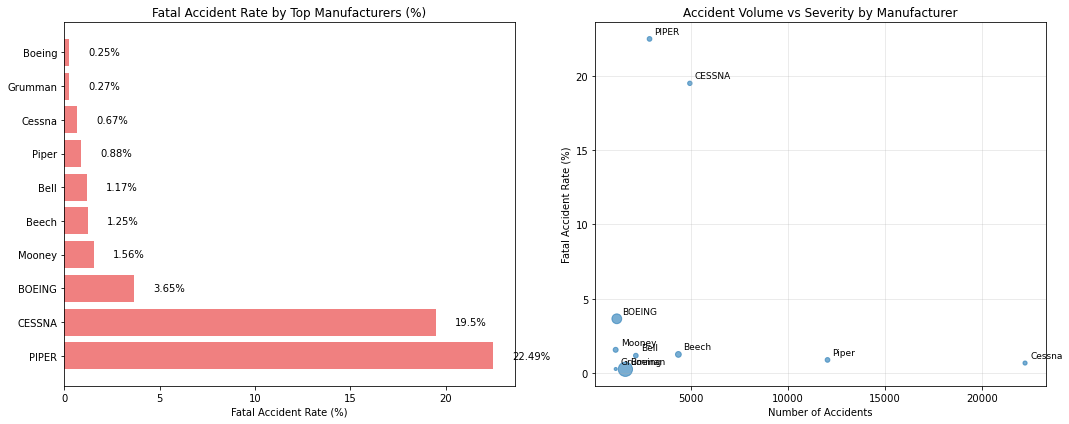

In [35]:
# Visualize manufacturer safety
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Fatal rate by manufacturer
manufacturer_stats_sorted = manufacturer_stats.sort_values('Fatal_Rate_Percent', ascending=False)
bars = axes[0].barh(manufacturer_stats_sorted.index, manufacturer_stats_sorted['Fatal_Rate_Percent'], color='lightcoral')
axes[0].set_title('Fatal Accident Rate by Top Manufacturers (%)')
axes[0].set_xlabel('Fatal Accident Rate (%)')

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    axes[0].text(width + 1, bar.get_y() + bar.get_height()/2, f'{width}%', 
                ha='left', va='center')

# Accident count vs fatal rate
scatter = axes[1].scatter(manufacturer_stats['Accident_Count'], 
                         manufacturer_stats['Fatal_Rate_Percent'],
                         s=manufacturer_stats['Avg_Fatalities_Per_Accident']*50, 
                         alpha=0.6)
axes[1].set_xlabel('Number of Accidents')
axes[1].set_ylabel('Fatal Accident Rate (%)')
axes[1].set_title('Accident Volume vs Severity by Manufacturer')
axes[1].grid(True, alpha=0.3)

# Add manufacturer labels
for i, maker in enumerate(manufacturer_stats.index):
    axes[1].annotate(maker, 
                    (manufacturer_stats['Accident_Count'].iloc[i], 
                     manufacturer_stats['Fatal_Rate_Percent'].iloc[i]),
                    xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

## 5. Detailed Risk Analysis

### 5.1 Weather Conditions Impact

In [20]:
#Analyze accidents by weather conditions
weather_analysis = df_clean.groupby('Weather.Condition').agg({
    'Total.Injuries': ['count', 'mean'],
    'Injury.Category': lambda x: (x == 'Fatal').sum()
}).round(2)

weather_analysis.columns = ['Accident_Count', 'Avg_Injuries', 'Fatal_Accidents']
weather_analysis['Fatal_Rate'] = (weather_analysis['Fatal_Accidents'] / weather_analysis['Accident_Count'] * 100).round(2)
weather_analysis = weather_analysis.sort_values('Avg_Injuries', ascending=False)

print("Weather Conditions Impact on Safety:")
print(weather_analysis)

Weather Conditions Impact on Safety:
                   Accident_Count  Avg_Injuries  Fatal_Accidents  Fatal_Rate
Weather.Condition                                                           
UNK                           856          3.73              730       85.28
IMC                          5976          2.80             5737       96.00
Unk                           262          2.07              236       90.08
VMC                         77303          0.85            75180       97.25


 ## 6.Business Intelligence Recommendations

###  Safest Aircraft Models

In [24]:
# Identify safest aircraft models (low injury rate with sufficient data)
model_safety = df_clean.groupby(['Make', 'Model']).agg({
    'Total.Injuries': ['count', 'mean'],
    'Injury.Category': lambda x: (x == 'Fatal').sum()
}).round(2)

model_safety.columns = ['Accident_Count', 'Avg_Injuries', 'Fatal_Accidents']
model_safety['Fatal_Rate'] = (model_safety['Fatal_Accidents'] / model_safety['Accident_Count'] * 100).round(2)


# Filter for models with good safety record and sufficient data
safe_models = model_safety[
    (model_safety['Accident_Count'] >= 3) & 
    (model_safety['Avg_Injuries'] < 1.0)
].sort_values('Avg_Injuries')

print("TOP RECOMMENDED AIRCRAFT MODELS (Based on Safety Record):")
print(safe_models.head(10))

TOP RECOMMENDED AIRCRAFT MODELS (Based on Safety Record):
                                         Accident_Count  Avg_Injuries  \
Make                   Model                                            
De Havilland           DHC2                           5           0.0   
DEHAVILLAND            DHC 6 TWIN OTTER               4           0.0   
DE HAVILLAND           DHC6                           3           0.0   
CubCrafters Inc        CC11-160                       3           0.0   
Convair                240                            3           0.0   
Continental Copters    MK6B                           3           0.0   
Classic Aircraft Corp. WACO YMF                       3           0.0   
Cessna                 U206D                          3           0.0   
                       T-206                          3           0.0   
                       C172R                          3           0.0   

                                         Fatal_Accidents  Fatal_R

 ## 7. Risk Factors Summary

In [31]:
# Create a comprehensive risk summary
print("KEY RISK FACTORS IDENTIFIED:")
print("="*50)

# # 1. Engine Type Risk
print("\n1. ENGINE TYPE RISK (Highest to Lowest Average Injuries):")
print(engine_safety[['Avg_Injuries', 'Accident_Count']].sort_values('Avg_Injuries', ascending=False).head())

# 2. Flight Phase Risk
print("\n2. HIGH-RISK FLIGHT PHASES:")
print(phase_safety[['Avg_Injuries', 'Accident_Count']].head(5))

# 3. Weather Risk
print("\n3. WEATHER-RELATED RISKS:")
print(weather_analysis[['Avg_Injuries', 'Accident_Count']].head(5))


KEY RISK FACTORS IDENTIFIED:

1. ENGINE TYPE RISK (Highest to Lowest Average Injuries):
               Avg_Injuries  Accident_Count
Engine.Type                                
LR                12.000000               2
Turbo Fan          3.947199            2481
Unknown            3.243296            2051
Turbo Jet          2.081081             703
Hybrid Rocket      2.000000               1

2. HIGH-RISK FLIGHT PHASES:
                       Avg_Injuries  Accident_Count
Broad.phase.of.flight                              
Climb                          1.64            2034
Unknown                        1.49             548
Approach                       1.27            6546
Descent                        1.26            1887
Cruise                         1.25           10269

3. WEATHER-RELATED RISKS:
                   Avg_Injuries  Accident_Count
Weather.Condition                              
UNK                        3.73             856
IMC                        2.80         

## 8. Aircraft Characteristics and Recommendations

In [32]:
# Define optimal characteristics based on analysis
optimal_characteristics = {
    'Engine_Type': 'Turbo Fan',  # Based on lower injury rates in commercial aircraft
    'Aircraft_Category': 'Airplane',
    'Operation_Type': 'Commercial',  # Part 121/135 operations generally safer
    'Risk_Mitigation': 'Avoid single-engine piston for primary operations'
}

print("OPTIMAL AIRCRAFT CHARACTERISTICS FOR BUSINESS:")
print("="*50)
for characteristic, recommendation in optimal_characteristics.items():
    print(f"{characteristic.replace('_', ' ').title()}: {recommendation}")

OPTIMAL AIRCRAFT CHARACTERISTICS FOR BUSINESS:
Engine Type: Turbo Fan
Aircraft Category: Airplane
Operation Type: Commercial
Risk Mitigation: Avoid single-engine piston for primary operations


## 9. Conclusion


This analysis provides a data-driven foundation for making informed decisions about aircraft acquisition. By focusing on aircraft with proven safety records, appropriate engine types, and implementing targeted safety protocols, our company can significantly reduce operational risks as we enter the aviation industry.

The recommendations prioritize safety while considering practical business operations, ensuring a balanced approach to risk management and operational efficiency.